# Structural equivalence

This notebook will explore the structural properties of the network generated previously. The aim is to identify actors that are structurally similar, that is, they have the same "position" or "role" in the network.

The investigation is inspired by Hanneman and Riddle [see text](https://faculty.ucr.edu/~hanneman/nettext/C13_%20Structural_Equivalence.html)

In [1]:
import collections
import pandas as pd
import numpy as np
import scipy.stats
import networkx as nx
from matplotlib import pyplot as plt

Import data:

In [66]:
data = pd.read_excel('Lev17-26.edges.Static.xlsx')

In [67]:
data.head()

,Source,Source_label,Source_agency,Target,Target_label,Target_agency,Label,Weight,Type,Clause
0,49,Aaron's_sons,5,43,YHWH,0,swing,25,Directed,440323
1,43,YHWH,5,39,Moses,-1,speak,36,Directed,440335
2,53,Israelites,5,43,YHWH,-1,approach,36,Directed,440341
3,43,YHWH,5,39,Moses,-1,speak,36,Directed,440342
4,53,Israelites,5,43,YHWH,-1,approach,36,Directed,440347


There are at least three ways for exploring the structural properties of the data:

1. As a directed network without weighted ties (that is, a binary graph)
2. As a directed network with weighted ties (ignoring the label and value of the tie)
3. As a directed network with valued ties (ignoring the weight)

None of the methods fully capture the complexity of the network which is compromised of actors in a multiplicity of ways (cf. the value of the ties) and often multiple times (weight). We will go with option 2 which seems to be a good compromise in that it is not too complex (by focusing on the type of interactions, either verb or agency) and not too simple (by ignoring the weight of the directed edges).

In [68]:
G = nx.MultiDiGraph()

for n, row in data.iterrows():
    G.add_edge(row.Source_label, row.Target_label, value=row.Weight)

In [69]:
nodes = list(G.nodes())

The data are transformed into a matrix:

In [70]:
matrix = nx.to_numpy_matrix(G)

In [71]:
df = pd.DataFrame(matrix, columns=nodes, index=nodes)

Index is out-degree, while columns are in-degree

In [72]:
df.iloc[:7,:7]

,Aaron's_sons,YHWH,Moses,Israelites,kinsmen,an_Israelite,Aaron
Aaron's_sons,0.0,9.0,0.0,1.0,0.0,1.0,0.0
YHWH,5.0,2.0,18.0,49.0,5.0,9.0,7.0
Moses,9.0,0.0,0.0,23.0,0.0,0.0,8.0
Israelites,2.0,31.0,1.0,0.0,0.0,5.0,0.0
kinsmen,0.0,0.0,0.0,0.0,0.0,6.0,0.0
an_Israelite,0.0,6.0,0.0,0.0,0.0,0.0,0.0
Aaron,0.0,8.0,0.0,1.0,1.0,0.0,0.0


### Correlations

#### Pearson correlation coefficient

In [74]:
pearson = np.corrcoef(matrix)

C:\Users\Ejer\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Ejer\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [75]:
pearson_df = pd.DataFrame(pearson, columns=nodes, index=nodes)
pearson_df.iloc[:7,:7]

,Aaron's_sons,YHWH,Moses,Israelites,kinsmen,an_Israelite,Aaron
Aaron's_sons,1.000000,0.097852,0.053589,0.884783,0.056282,0.451448,0.910584
YHWH,0.097852,1.000000,0.853793,0.033671,0.166210,-0.127059,0.072960
Moses,0.053589,0.853793,1.000000,-0.045701,-0.041060,-0.110402,0.041833
Israelites,0.884783,0.033671,-0.045701,1.000000,0.171726,0.523939,0.812204
kinsmen,0.056282,0.166210,-0.041060,0.171726,1.000000,-0.073963,-0.059516
an_Israelite,0.451448,-0.127059,-0.110402,0.523939,-0.073963,1.000000,0.491895
Aaron,0.910584,0.072960,0.041833,0.812204,-0.059516,0.491895,1.000000


#### Euclidian distances

In [76]:
from scipy.spatial.distance import pdist, squareform

In [77]:
dist = pdist(df, 'euclidean')
distance_df = pd.DataFrame(squareform(dist), columns=nodes, index=nodes)
distance_df.iloc[:7,:7]

,Aaron's_sons,YHWH,Moses,Israelites,kinsmen,an_Israelite,Aaron
Aaron's_sons,0.000000,54.369109,26.795522,25.980762,11.090537,10.908712,3.872983
YHWH,54.369109,0.000000,35.213634,61.098281,53.953684,55.991071,54.378304
Moses,26.795522,35.213634,0.000000,42.272923,26.851443,28.513155,26.627054
Israelites,25.980762,61.098281,42.272923,0.000000,33.136083,28.670542,27.018512
kinsmen,11.090537,53.953684,26.851443,33.136083,0.000000,13.416408,11.224972
an_Israelite,10.908712,55.991071,28.513155,28.670542,13.416408,0.000000,10.099505
Aaron,3.872983,54.378304,26.627054,27.018512,11.224972,10.099505,0.000000


### Clustering

#### Hiearchical clustering

In [78]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [79]:
linked = linkage(matrix, 'single')

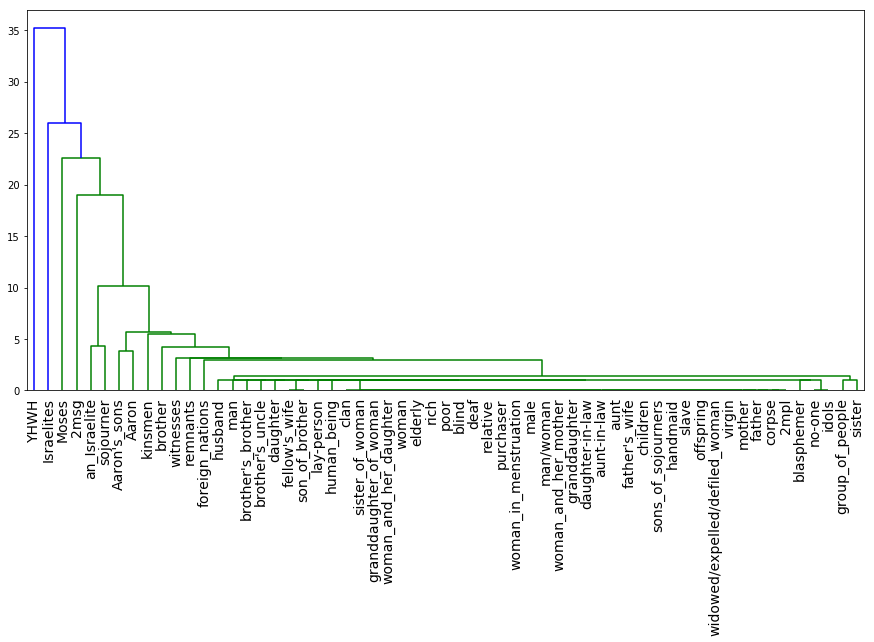

In [80]:
plt.figure(figsize=(15, 7))
dendrogram(linked,
            orientation='top',
            labels=nodes,
            distance_sort='descending',
            show_leaf_counts=True,
            leaf_font_size = 14)
plt.show()

In [81]:
import scipy.cluster.hierarchy as shc

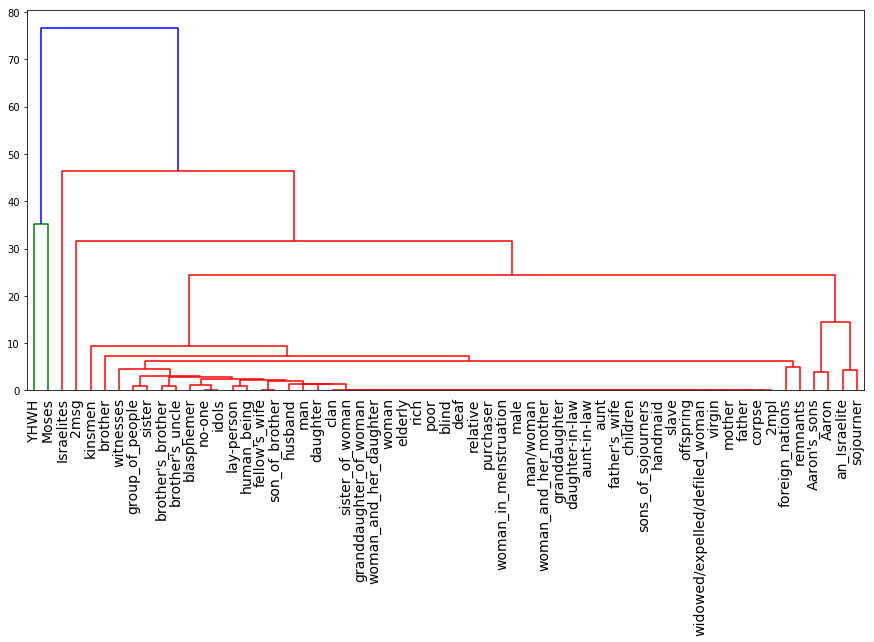

In [82]:
plt.figure(figsize=(15, 7))
dend = shc.dendrogram(shc.linkage(matrix, method='ward'), labels=nodes, leaf_font_size=14)

The dendrogram shows interesting features. For one thing, YHWH and Moses are clearly distinct from the rest of the participants and form their own cluster. It is interesting because YHWH is much more frequent in the text and Moses is reduced to a secondary role intermediating between YHWH and the people. Thus, we find two overall clusters.

Secondly, the Israelites as a group is also rather distinct and not closely related to anyone. On the opposite side of the dendrogram, a singular Isralite and the sojourner are closely related, which makes sense, because they both share some of the same responsibilites. Aaron's sons and Aaron are also closely related, also to be expected because the Aaron and Aaron's sons (the priests) appear in the same contexts.

#### Multi-dimensional scaling (MDS)

In [83]:
from sklearn.manifold import MDS

In [84]:
embedding = MDS(n_components=2)

In [85]:
X_transformed = embedding.fit_transform(df)
X_transformed.shape

C:\Users\Ejer\Anaconda3\lib\site-packages\sklearn\manifold\mds.py:421: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


(59, 2)

In [86]:
X = pd.DataFrame(X_transformed, index=nodes)

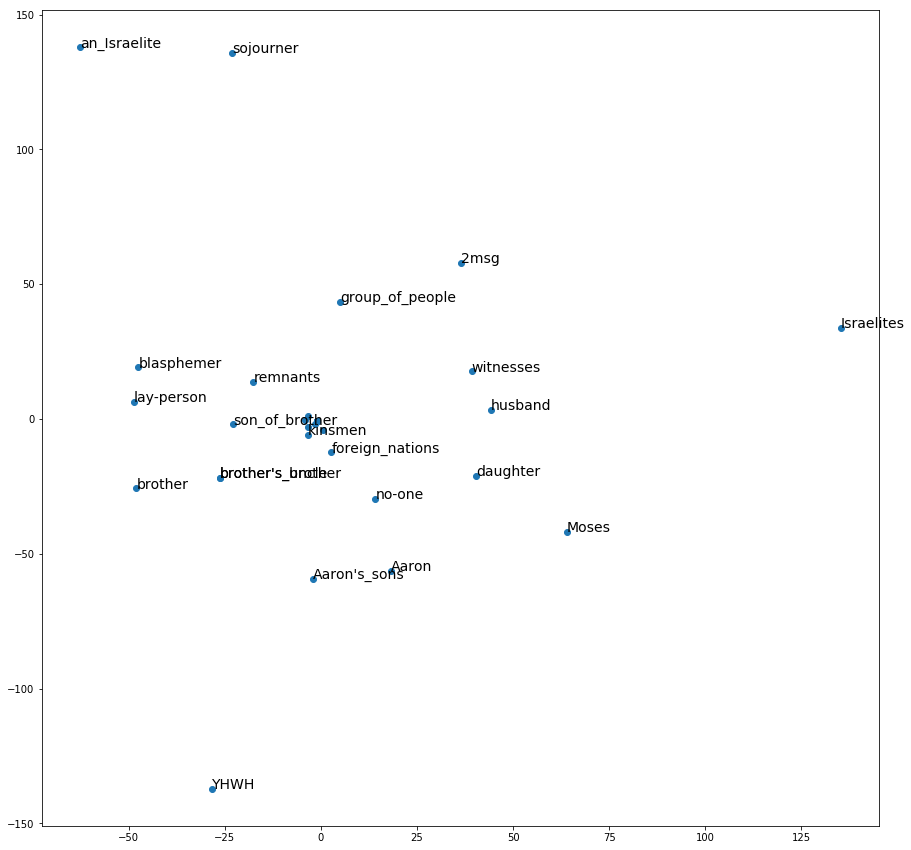

In [136]:
plt.figure(figsize=(15,15))
plt.scatter(X.iloc[:,0],X.iloc[:,1])

for n, row in X.iterrows():
    if (row[0] > -5 and row[0] < 5) and (row[1] < 5 and row[1] > -5): #Measures are taken to avoid overlapping labels
        continue
    else:
        plt.text(row[0],row[1],n, size=14)

plt.show()

How should the dimensions be interpreted?
1. The first dimension (X-axis):
2. The second dimension (Y-axis):

Participants that are situated closely together tend to have approximately the same in- and out-degrees, e.g. Aaron and Aaron's sons.

This interpretation can be verified by looking at row and column sums in the dataframe below: 

In [88]:
#Add row sum
row_sum = pd.DataFrame(df.sum(axis=1)).T
row_sum.index = ['total']
df1 = df.append(row_sum)

#Add column sum
df1.insert(58, 'total', df1.sum(axis=0))

In [89]:
df1

,Aaron's_sons,YHWH,Moses,Israelites,kinsmen,an_Israelite,Aaron,blasphemer,sojourner,2msg,...,son_of_brother,woman_and_her_daughter,granddaughter_of_woman,sister_of_woman,brother's_brother,clan,brother's_uncle,man,total,husband
Aaron's_sons,0.0,9.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,0.0
YHWH,5.0,2.0,18.0,49.0,5.0,9.0,7.0,0.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,191.0,0.0
Moses,9.0,0.0,0.0,23.0,0.0,0.0,8.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.0,0.0
Israelites,2.0,31.0,1.0,0.0,0.0,5.0,0.0,3.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,165.0,0.0
kinsmen,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0
an_Israelite,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,0.0
Aaron,0.0,8.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,0.0
blasphemer,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0
sojourner,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,0.0
2msg,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,76.0,0.0


In [90]:
degree = pd.concat([pd.DataFrame(df.sum(axis=0)), pd.DataFrame(df.sum(axis=1))], axis=1)
degree.columns = ['in-degree','out-degree']

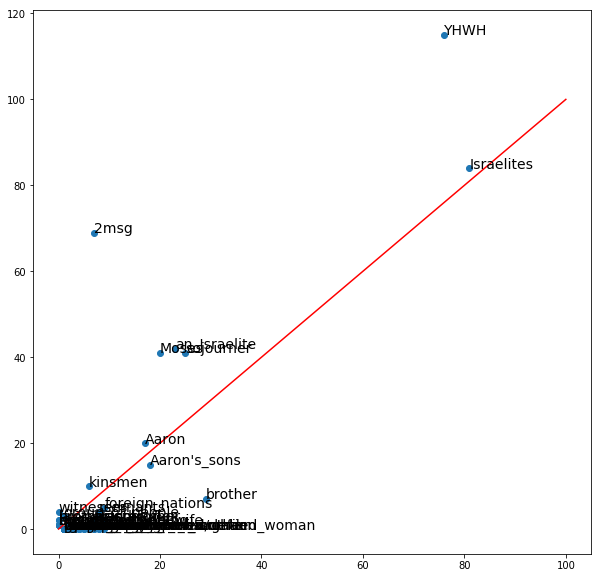

In [91]:
plt.figure(figsize=(10,10))

plt.scatter(degree['in-degree'],degree['out-degree'])
for n, row in degree.iterrows():
    plt.text(row[0],row[1],n, size=14)
    
x = np.linspace(0, 100, 100)
plt.plot(x, x, color ='red')

plt.show()

## Structural equivalence with valued edges

Having explored the structural properties in terms of (multiple) ties between the actors, we want to go a step deeper and explore the structural properties when looked from the perspective of agentivity.

The tie strength/value is computed by creating an attribute matrix with values (=agency) and by dividing the resulting matrix with the original matrix simply counting the number of ties. This will give us a matrix with the mean agency for each connection (normalizing for multiple ties).

Another option is simply to use absolute values and not normalizing for multiple ties. This procedure should cluster actors with similar counts of interactions as well as similar values.

In [137]:
sum_values = pd.DataFrame(nx.attr_matrix(G, edge_attr='value', rc_order=nodes), columns=nodes, index=nodes)
avg_values = (sum_values/df).fillna(0)

In [138]:
sum_values.iloc[:7,:7]

,Aaron's_sons,YHWH,Moses,Israelites,kinsmen,an_Israelite,Aaron
Aaron's_sons,0.0,89.0,0.0,49.0,0.0,36.0,0.0
YHWH,148.0,74.0,648.0,1873.0,125.0,441.0,233.0
Moses,324.0,0.0,0.0,828.0,0.0,0.0,288.0
Israelites,61.0,677.0,36.0,0.0,0.0,184.0,0.0
kinsmen,0.0,0.0,0.0,0.0,0.0,24.0,0.0
an_Israelite,0.0,268.0,0.0,0.0,0.0,0.0,0.0
Aaron,0.0,88.0,0.0,49.0,1.0,0.0,0.0


In [139]:
avg_values

,Aaron's_sons,YHWH,Moses,Israelites,kinsmen,an_Israelite,Aaron,blasphemer,sojourner,2msg,...,woman,son_of_brother,woman_and_her_daughter,granddaughter_of_woman,sister_of_woman,brother's_brother,clan,brother's_uncle,man,husband
Aaron's_sons,0.0,9.888889,0.0,49.00000,0.0,36.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YHWH,29.6,37.000000,36.0,38.22449,25.0,49.0,33.285714,0.0,49.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Moses,36.0,0.000000,0.0,36.00000,0.0,0.0,36.000000,49.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Israelites,30.5,21.838710,36.0,0.00000,0.0,36.8,0.000000,49.0,27.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
kinsmen,0.0,0.000000,0.0,0.00000,0.0,4.0,0.000000,0.0,4.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
an_Israelite,0.0,44.666667,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aaron,0.0,11.000000,0.0,49.00000,1.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
blasphemer,0.0,49.000000,0.0,25.00000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sojourner,0.0,44.666667,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2msg,9.0,13.571429,0.0,0.00000,0.0,0.0,0.000000,0.0,20.5,0.0,...,28.428571,0.0,1.0,1.0,25.0,0.0,0.0,0.0,0.0,0.0


Now we can carry out the same measures of correlation and clustering as above.

### Correlations

#### Pearson's correlation coefficients

In [140]:
pearson = np.corrcoef(avg_values)

C:\Users\Ejer\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Ejer\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [141]:
pearson_df = pd.DataFrame(pearson, columns=nodes, index=nodes)
pearson_df.iloc[:7,:7]

,Aaron's_sons,YHWH,Moses,Israelites,kinsmen,an_Israelite,Aaron
Aaron's_sons,1.000000,0.407869,0.318545,0.077017,0.298770,-0.083449,0.626839
YHWH,0.407869,1.000000,0.236247,0.163929,0.337571,-0.215528,0.190089
Moses,0.318545,0.236247,1.000000,0.216286,-0.061741,-0.162048,0.308986
Israelites,0.077017,0.163929,0.216286,1.000000,0.173276,0.047036,-0.120185
kinsmen,0.298770,0.337571,-0.061741,0.173276,1.000000,0.023552,-0.064777
an_Israelite,-0.083449,-0.215528,-0.162048,0.047036,0.023552,1.000000,-0.035357
Aaron,0.626839,0.190089,0.308986,-0.120185,-0.064777,-0.035357,1.000000


#### Euclidean distances

In [142]:
dist = pdist(avg_values, 'euclidean')
distance_df = pd.DataFrame(squareform(dist), columns=nodes, index=nodes)
distance_df

,Aaron's_sons,YHWH,Moses,Israelites,kinsmen,an_Israelite,Aaron,blasphemer,sojourner,2msg,...,woman,son_of_brother,woman_and_her_daughter,granddaughter_of_woman,sister_of_woman,brother's_brother,clan,brother's_uncle,man,husband
Aaron's_sons,0.000000,127.387534,81.478771,146.419111,60.314096,165.589413,52.242077,59.031170,152.600512,95.294254,...,62.271905,67.102832,62.271905,62.271905,62.271905,71.929063,62.271905,71.929063,62.400241,78.618001
YHWH,127.387534,0.000000,139.508555,163.722715,140.419270,203.896320,138.695968,133.949046,193.496180,149.596468,...,143.015983,145.184612,143.015983,143.015983,143.015983,147.477359,143.015983,147.477359,143.071910,151.177285
Moses,81.478771,139.508555,0.000000,141.185293,79.605276,175.255445,81.510735,86.689100,163.038442,105.416400,...,79.303216,83.150466,79.303216,79.303216,79.303216,87.091905,79.303216,87.091905,79.404030,93.220169
Israelites,146.419111,163.722715,141.185293,0.000000,142.055929,179.678806,154.999469,146.724550,183.296988,149.447447,...,143.674239,145.833079,143.674239,143.674239,143.674239,137.398279,143.674239,137.398279,142.359710,151.800155
kinsmen,60.314096,140.419270,79.605276,142.055929,0.000000,155.491064,62.697687,55.443665,141.578719,73.182084,...,6.928203,25.942244,6.928203,6.928203,6.928203,36.660606,6.928203,36.660606,8.000000,49.487372
an_Israelite,165.589413,203.896320,175.255445,179.678806,155.491064,0.000000,161.709012,151.901737,56.245555,157.319762,...,156.286503,158.273406,156.286503,156.286503,156.286503,148.974733,156.286503,148.974733,155.696728,163.787885
Aaron,52.242077,138.695968,81.510735,154.999469,62.697687,161.709012,0.000000,58.146367,148.380817,95.131729,...,62.313722,67.141641,62.313722,62.313722,62.313722,71.965269,62.313722,71.965269,62.441973,78.651128
blasphemer,59.031170,133.949046,86.689100,146.724550,55.443665,151.901737,58.146367,0.000000,137.627033,84.661782,...,55.009090,60.423505,55.009090,55.009090,55.009090,65.741920,55.009090,65.741920,55.154329,73.668175
sojourner,152.600512,193.496180,163.038442,183.296988,141.578719,56.245555,148.380817,137.627033,0.000000,146.260282,...,142.451864,144.628951,142.451864,142.451864,142.451864,143.521892,142.451864,143.521892,142.508012,150.643731
2msg,95.294254,149.596468,105.416400,149.447447,73.182084,157.319762,95.131729,84.661782,146.260282,0.000000,...,73.970382,78.080839,73.970382,73.970382,73.970382,77.302117,73.970382,77.302117,74.078454,88.727771


### Clustering

#### Hierarchical clustering

On the basis of the data, we can assume that participants which cluster together are participants which share a high degree of similar nodes as well as a similar degree of agentivity in  those interactions.

First, we analyze the summed values:

In [143]:
linked = linkage(sum_values, 'single')

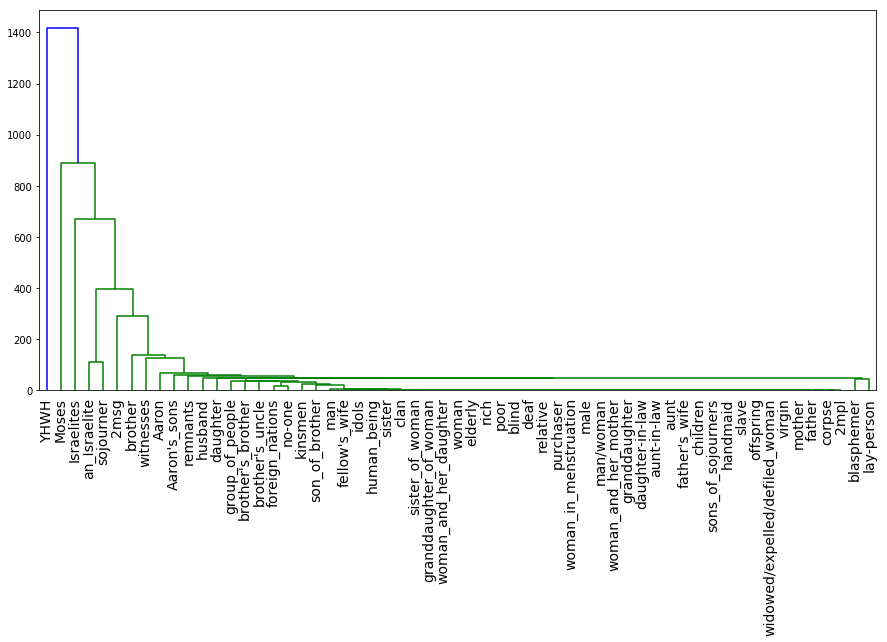

In [144]:
plt.figure(figsize=(15, 7))
dendrogram(linked,
            orientation='top',
            labels=nodes,
            distance_sort='descending',
            show_leaf_counts=True,
            leaf_font_size = 14)
plt.show()

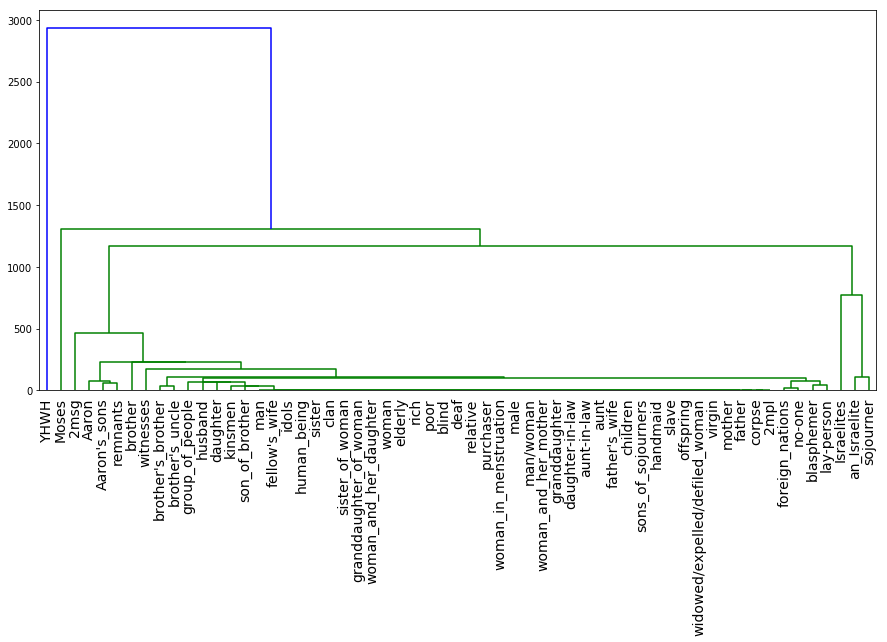

In [145]:
plt.figure(figsize=(15, 7))
dend = shc.dendrogram(shc.linkage(sum_values, method='ward'), labels=nodes, leaf_font_size=14)

Both dendrograms show some clustering. Because YHWH is exceptional because of the actor's many ties, the result is basically two clusters: YHWH on the one side, and the remaining participants on the other side. However, there are multiple subclusters that are worth noticing. Aaron and Aaron's sons form a subcluster, as well as an Israelite and the sojourner.

#### Mean values

It makes sense to explore the mean values as well because they are normalized for multiple ties. It means that if YHWH has 30 interactions with Moses, the interaction between YHWH and Moses will be regarded as simply one with an average value of all interactions. This procedure should result in a less stratified clustering because nodes with less ties will contribute more.

In [146]:
linked = linkage(avg_values, 'single')

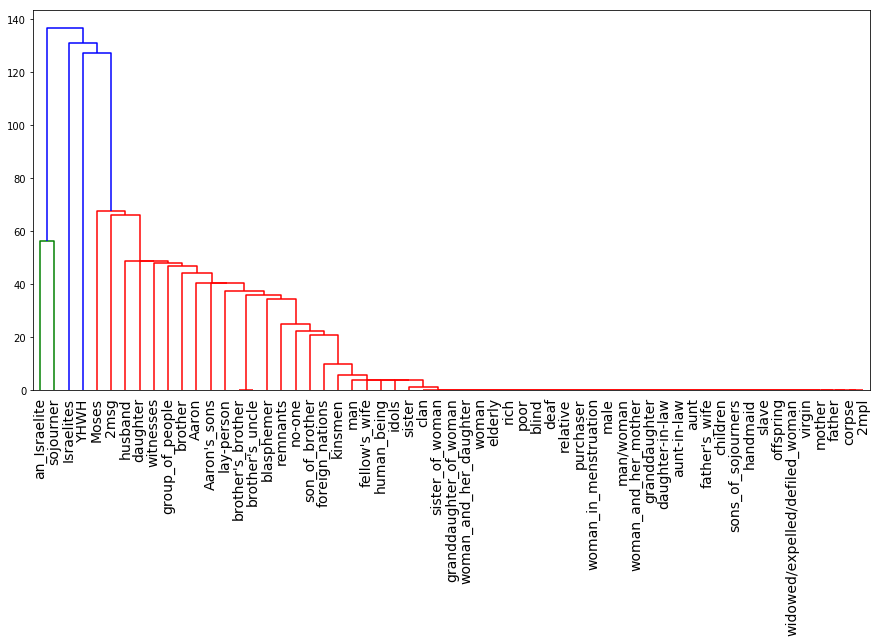

In [147]:
plt.figure(figsize=(15, 7))
dendrogram(linked,
            orientation='top',
            labels=nodes,
            distance_sort='descending',
            show_leaf_counts=True,
            leaf_font_size = 14)
plt.show()

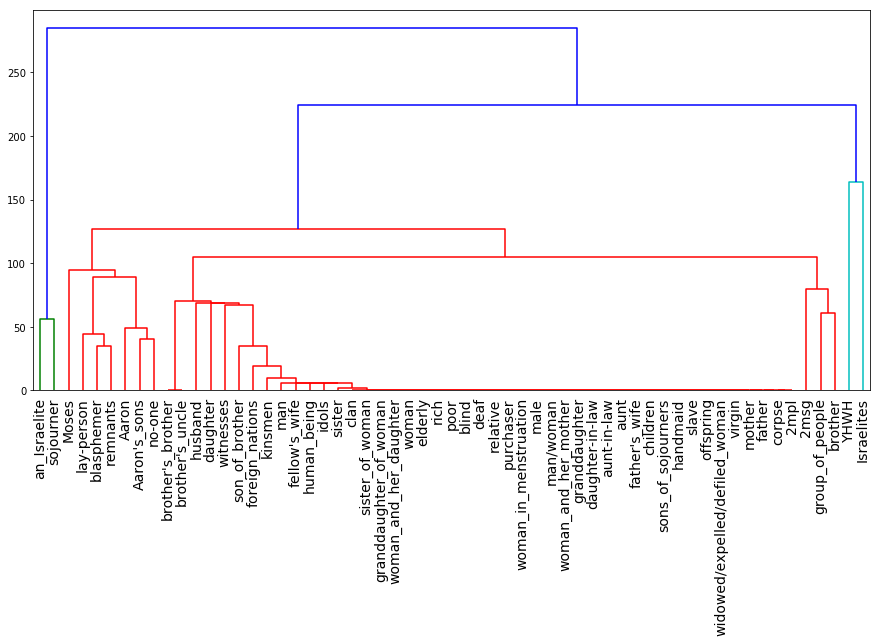

In [148]:
plt.figure(figsize=(15, 7))
dend = shc.dendrogram(shc.linkage(avg_values, method='ward'), labels=nodes, leaf_font_size=14)

The dendrogram again shows interesting stuff. To the left, 2ms, an Israelite and the sojourner form a distinct cluster, although with some internal variation. Nevertheless, this cluster is very interesting, because all of these participants are individuals with corresponding ethical obligations. The fact that they share a degree of agentivity supports this notion of a specific role in the text.

Most actors fall into a middle group which is hardly distinguishable. These participants do rarely interact so their overall level of agency is not significatn.

On the right side of the dendrogram, Aaron and Aaron's sons are again clustered together. Not only are they structurally similar in terms of which other actors they are connected with, they are also similar in their level of agency in those interactions. 

#### MDS

In [158]:
embedding = MDS(n_components=2)

In [159]:
X_transformed = embedding.fit_transform(avg_values)
X_transformed.shape

C:\Users\Ejer\Anaconda3\lib\site-packages\sklearn\manifold\mds.py:421: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


(59, 2)

In [160]:
X = pd.DataFrame(X_transformed, index=nodes)

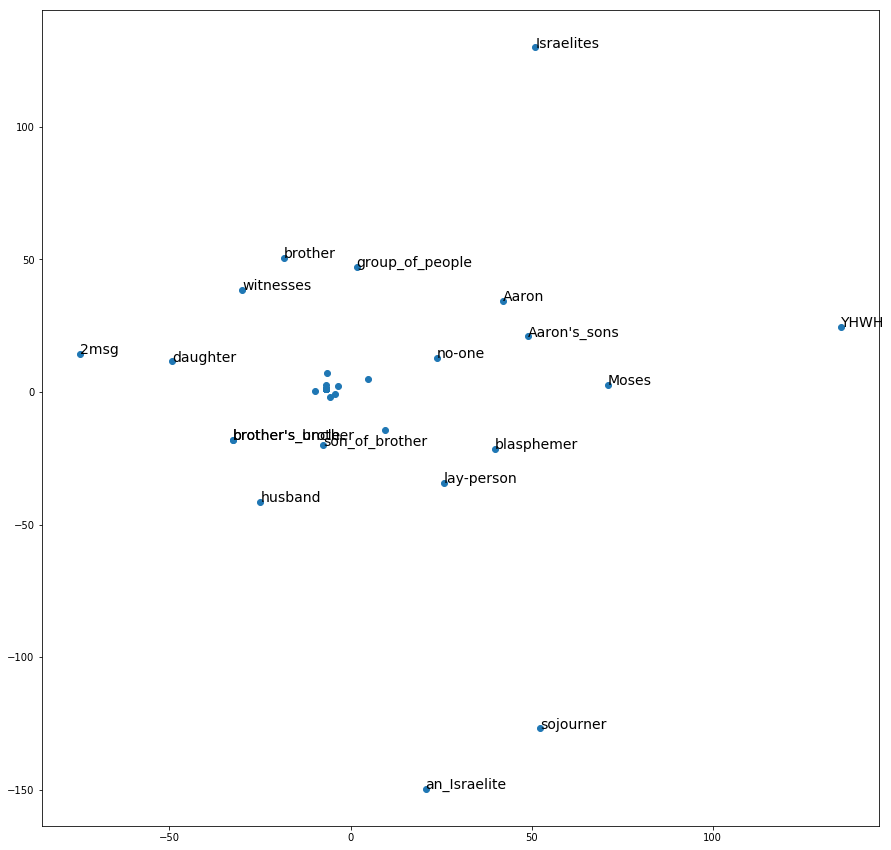

In [164]:
plt.figure(figsize=(15,15))
plt.scatter(X.iloc[:,0],X.iloc[:,1])

for n, row in X.iterrows():
    if (row[0] > -15 and row[0] < 10) and (row[1] > -20 and row[1] < 10): #Measures are taken to avoid overlapping labels
        continue
    else:
        plt.text(row[0],row[1],n, size=14)

plt.show()

The graph is not easy to interpret. If we look at the in-degree and out-degree means of agentivity, as in the table below, a picture emerges. The first dimension (the horizontal axis), seems to correspond with level of indegree vs. level of outdegree. YHWH has the highest mean indegree-agency, while 2ms has the highest mean outdegree-agency (displayed in the scatterplot below).

Dimension 2:

In [45]:
avg_values['brother']

Aaron's_sons                       0.00
YHWH                               0.00
Moses                              0.00
Israelites                        42.50
kinsmen                            0.00
an_Israelite                      49.00
Aaron                              0.00
blasphemer                         0.00
sojourner                         13.75
2ms                               11.00
corpse                             0.00
foreign_nations                    0.00
remnants                           0.00
group_of_people                    0.00
2mp                                0.00
lay-person                         0.00
witnesses                          0.00
father                             0.00
mother                             0.00
virgin                             0.00
widowed/expelled/defiled_woman     0.00
offspring                          0.00
human_being                        0.00
slave                              0.00
brother                            0.00


In [46]:
avg_values[avg_values > 0].count()

Aaron's_sons                       4
YHWH                              11
Moses                              3
Israelites                         8
kinsmen                            2
an_Israelite                       6
Aaron                              4
blasphemer                         3
sojourner                          7
2ms                                4
corpse                             3
foreign_nations                    2
remnants                           2
group_of_people                    1
2mp                                1
lay-person                         0
witnesses                          0
father                             5
mother                             5
virgin                             1
widowed/expelled/defiled_woman     3
offspring                          4
human_being                        3
slave                              1
brother                            6
handmaid                           3
sons_of_sojourners                 1
c

In [47]:
degree = pd.concat([pd.DataFrame(avg_values.mean(axis=0)), pd.DataFrame(avg_values.mean(axis=1))], axis=1)
degree.columns = ['in-degree-agency','out-degree-agency']
degree.T[['YHWH','2ms','an_Israelite','brother','lay-person','daughter','Moses','man/woman']]

,YHWH,2ms,an_Israelite,brother,lay-person,daughter,Moses,man/woman
in-degree-agency,4.976820,1.044068,2.572881,3.190678,0.000000,0.423729,1.644068,0.830508
out-degree-agency,8.524467,3.567797,10.563842,1.569492,1.220339,0.830508,2.661017,0.000000


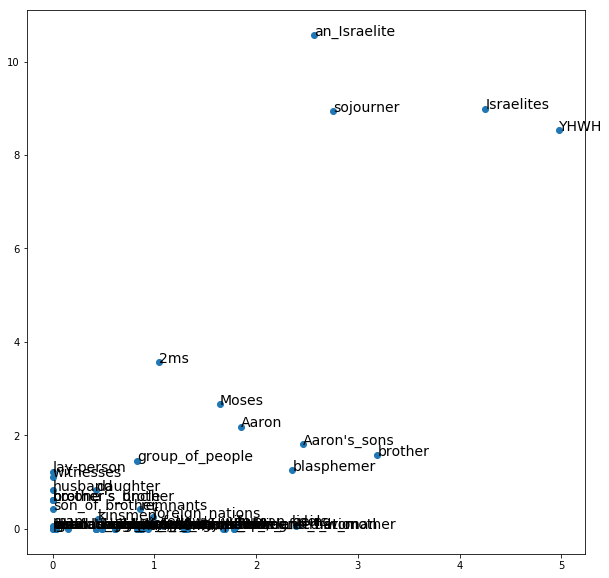

In [48]:
plt.figure(figsize=(10,10))

plt.scatter(degree['in-degree-agency'],degree['out-degree-agency'])
for n, row in degree.iterrows():
    plt.text(row[0],row[1],n, size=14)

plt.show()